In [1]:
from LineSplitAuro import LineSplit

In [2]:
# check files

files = ['summary_sriAurobindo.txt', 'Ref_SriAurobindo_sir.txt', 'Ref_SriAurobindo_mihir.txt', 'Ref_SriAurobindo_chandni.txt', 'Ref_SriAurobindo_sweta.txt']

for file in files:
    print(f"Lines Count {file}: ", len(LineSplit(file)))

Lines Count summary_sriAurobindo.txt:  9
Lines Count Ref_SriAurobindo_sir.txt:  9
Lines Count Ref_SriAurobindo_mihir.txt:  9
Lines Count Ref_SriAurobindo_chandni.txt:  9
Lines Count Ref_SriAurobindo_sweta.txt:  9


In [3]:
common_matrix = []

for fOne in files:
    listOne = LineSplit(fOne)
    row = []
    
    for fTwo in files:
        listTwo = LineSplit(fTwo)
        cLines = []
        for line in listOne:
            if line in listTwo:
                cLines.append(line)
                listTwo.remove(line)
        row.append(len(cLines))
    common_matrix.append(row)

In [4]:
common_matrix

[[9, 5, 4, 0, 0],
 [5, 9, 4, 0, 0],
 [4, 4, 9, 0, 3],
 [0, 0, 0, 9, 5],
 [0, 0, 3, 5, 9]]

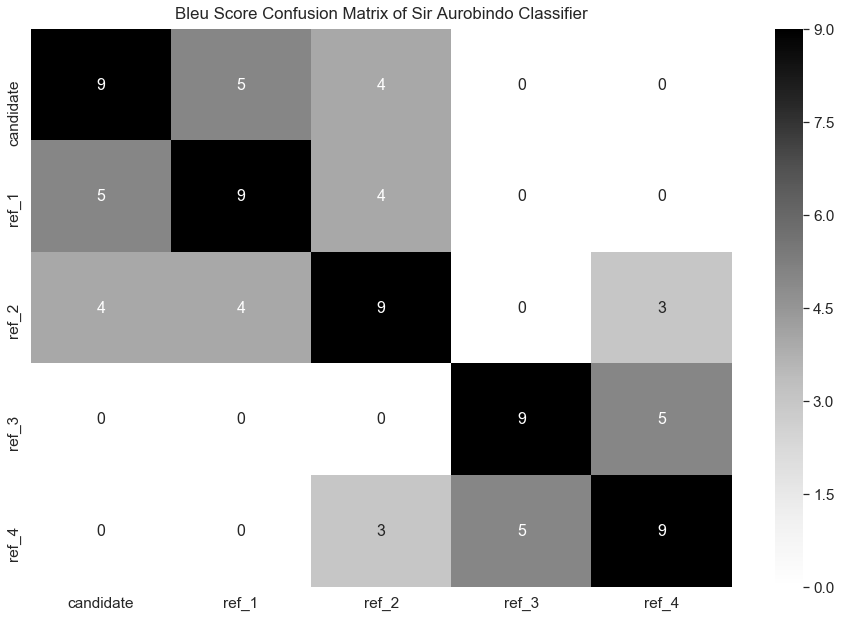

In [6]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# 'candidate', 'ref_sir', 'ref_mihir', ref_chandni', 'ref_sweta'

df_cm = pd.DataFrame(common_matrix, index = ['candidate', 'ref_1', 'ref_2', 'ref_3', 'ref_4'],
                  columns = ['candidate', 'ref_1', 'ref_2', 'ref_3', 'ref_4'])


sn.set(rc={'figure.figsize':(15.7,10.27)})
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap="Greys")# font size
plt.title(label="Bleu Score Confusion Matrix of Sir Aurobindo Classifier", pad=10.0)
plt.savefig('confusion_commonLines_sriaurobindo.png')
plt.show()